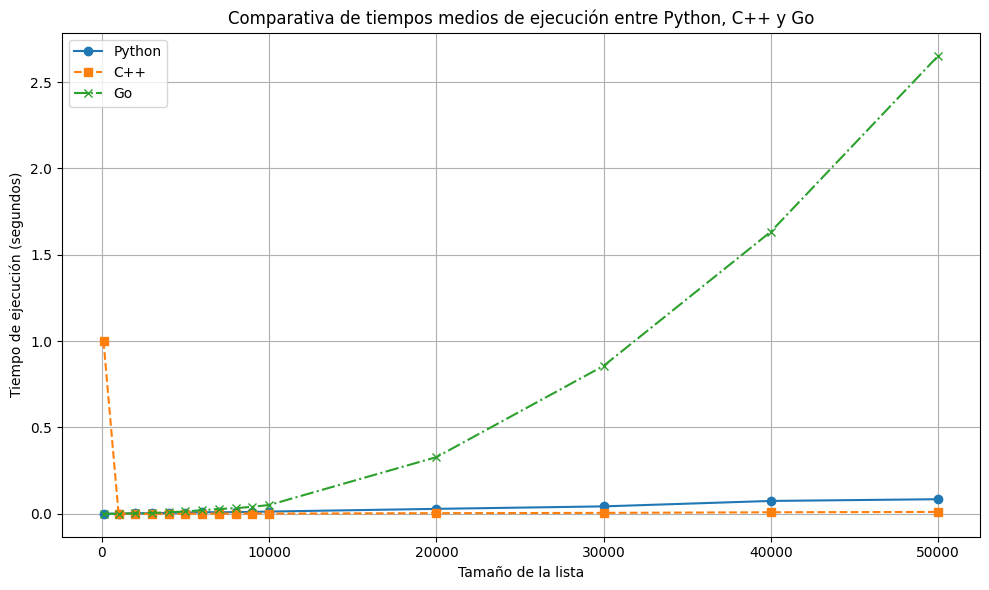

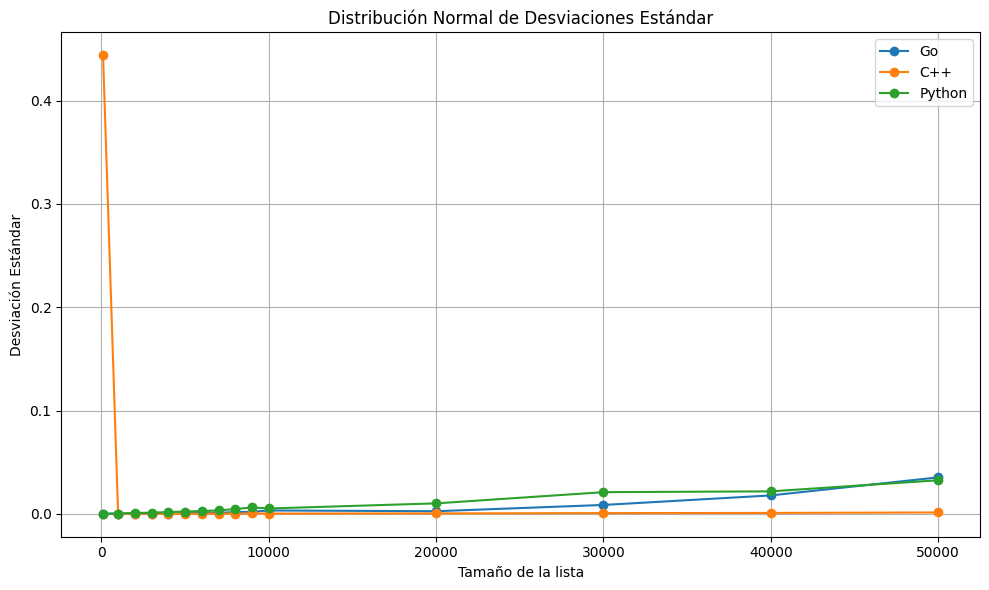

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def read_csv(file_path):
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [(int(row['Size']), float(row['Time'])) for row in reader]
    return data

def read_csv_desv(file_path):
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [(int(row['Size']), float(row['Desv'])) for row in reader]
    return data

def calculate_mean_and_std(results):
    sizes, times = zip(*results)
    mean_time = np.mean(times)
    std_time = np.std(times)
    return mean_time, std_time

def plot_mean_comparison(results_python, results_cpp, results_go):
    plt.figure(figsize=(10, 6))
    plt.grid(True)

    # Python
    
    sizes_python, times_python = zip(*results_python)
    plt.plot(sizes_python, times_python, label='Python', marker='o', linestyle='-')

    # C++
    
    sizes_cpp, times_cpp = zip(*results_cpp)
    plt.plot(sizes_cpp, times_cpp, label='C++', marker='s', linestyle='--')

    # Go
    
    sizes_go, times_go = zip(*results_go)
    plt.plot(sizes_go, times_go, label='Go', marker='x', linestyle='-.')
    
    plt.xlabel('Tamaño de la lista')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('Comparativa de tiempos medios de ejecución entre Python, C++ y Go')
    plt.legend()
    plt.tight_layout()

    # Guardar la figura como un archivo JPG
    plt.savefig('mean_comparison_plot.jpg')
    plt.show()


def plot_std_comparison(file_paths):
    labels = ['Go', 'C++', 'Python']

    plt.figure(figsize=(10, 6))
    plt.grid(True)

    for file_path, label in zip(file_paths, labels):
        data = read_csv_desv(file_path)
        sizes, desvs = zip(*data)
        plt.plot(sizes, desvs, label=label, marker='o')

    plt.xlabel('Tamaño de la lista')
    plt.ylabel('Desviación Estándar')
    plt.title('Distribución Normal de Desviaciones Estándar')
    plt.legend()
    plt.tight_layout()


    # Guardar la figura como un archivo JPG
    plt.savefig('std_comparison_plot.jpg')
    plt.show()

if __name__ == "__main__":
    results_python = read_csv('results_python_media.csv')
    results_cpp = read_csv('results_cpp_media.csv')
    results_go = read_csv('results_go_media.csv')

    plot_mean_comparison(results_python, results_cpp, results_go)
    file_paths = ['results_go_desv.csv', 'results_cpp_desv.csv', 'results_python_desv.csv']
    plot_std_comparison(file_paths)
